# **Importing Libraries and dataset**

In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
df = pd.read_csv("prostate.csv")
df.head(10)

# **Exploring dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   100 non-null    float64
 1   age      100 non-null    int64  
 2   lbph     100 non-null    float64
 3   lcp      100 non-null    float64
 4   gleason  100 non-null    int64  
 5   lpsa     100 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


**Summarizing the data.**

In [ ]:
# returns description of the data in the data frame
#computes and displays summary statistics for a dataframe
df.describe()

,lcavol,age,lbph,lcp,gleason,lpsa
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.313314,63.670000,0.105003,-0.215573,6.730000,2.427889
std,1.188287,7.483389,1.444604,1.392363,0.722719,1.172790
min,-1.347074,41.000000,-1.386294,-1.386294,6.000000,-0.430783
25%,0.512824,60.000000,-1.386294,-1.386294,6.000000,1.686269
50%,1.432655,64.500000,0.369180,-0.798508,7.000000,2.568788
75%,2.086639,68.000000,1.542187,0.902861,7.000000,3.042105
max,3.821004,79.000000,2.326302,2.904165,9.000000,5.582932


**Since there are no null values there is no need for data cleaning.**

In [ ]:
# check for missing values
print(df.isna().sum())

lcavol     0
age        0
lbph       0
lcp        0
gleason    0
lpsa       0
dtype: int64


**Selecting target variable**

In [ ]:
X = df.iloc[:,1:6].copy()
print(X)
y = df['lcavol']
print(y)

    age      lbph       lcp  gleason      lpsa
0    50 -1.386294 -1.386294        6 -0.430783
1    58 -1.386294 -1.386294        6 -0.162519
2    74 -1.386294 -1.386294        7 -0.162519
3    58 -1.386294 -1.386294        6 -0.162519
4    62 -1.386294 -1.386294        6  0.371564
..  ...       ...       ...      ...       ...
95   68  1.558145  1.558145        7  5.477509
96   68  0.438255  2.904165        7  5.582932
97   50 -1.386294 -1.386294        6  0.765468
98   64  0.615186 -1.386294        6  0.765468
99   58  1.536867 -1.386294        6  0.854415

[100 rows x 5 columns]
0    -0.579818
1    -0.994252
2    -0.510826
3    -1.203973
4     0.751416
        ...   
95    2.882564
96    3.471966
97   -1.049822
98    0.737164
99    0.693147
Name: lcavol, Length: 100, dtype: float64


**Splitting the dataset in 80: 20 i.e Train and Test**

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Displays the splitted data count
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (80, 5) (80,)
Testing dataset shape: (20, 5) (20,)


**Using a decision tree regressor.**

In [ ]:
rt = DecisionTreeRegressor(criterion = 'squared_error')
rt

DecisionTreeRegressor()

**Training a model.**

In [ ]:
model_r = rt.fit(X_train, y_train)
max_depth = rt.fit(X_train, y_train).get_depth()
max_depth


12

**Testing a model.**

In [ ]:
y_pred = model_r.predict(X_test)
y_pred

array([ 1.20597081,  3.24649099,  0.75141609,  0.51282363,  2.51365606,
        3.30284926,  1.04027671,  2.77570885,  0.54232429,  1.5623463 ,
        2.05923883,  1.73165554,  2.80759383,  1.20597081,  0.69314718,
       -0.40047757,  1.14740245,  0.18232156,  1.14740245, -1.04982212])

**Visualizing a decision tree.**

[Text(0.5056818181818182, 0.9285714285714286, 'x[2] <= 0.262\nsquared_error = 1.25\nsamples = 80\nvalue = 1.306'),
 Text(0.2556818181818182, 0.7857142857142857, 'x[4] <= 1.333\nsquared_error = 0.966\nsamples = 53\nvalue = 0.807'),
 Text(0.13636363636363635, 0.6428571428571429, 'x[0] <= 60.0\nsquared_error = 0.887\nsamples = 13\nvalue = -0.093'),
 Text(0.06818181818181818, 0.5, 'x[1] <= 0.075\nsquared_error = 0.423\nsamples = 6\nvalue = -0.697'),
 Text(0.045454545454545456, 0.35714285714285715, 'x[4] <= -0.297\nsquared_error = 0.044\nsamples = 5\nvalue = -0.976'),
 Text(0.022727272727272728, 0.21428571428571427, 'squared_error = 0.0\nsamples = 1\nvalue = -0.58'),
 Text(0.06818181818181818, 0.21428571428571427, 'x[4] <= 0.301\nsquared_error = 0.006\nsamples = 4\nvalue = -1.074'),
 Text(0.045454545454545456, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.09090909090909091, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.09090909090909091, 0.35714285714285715, 'squared_error = 0.0\nsamples 

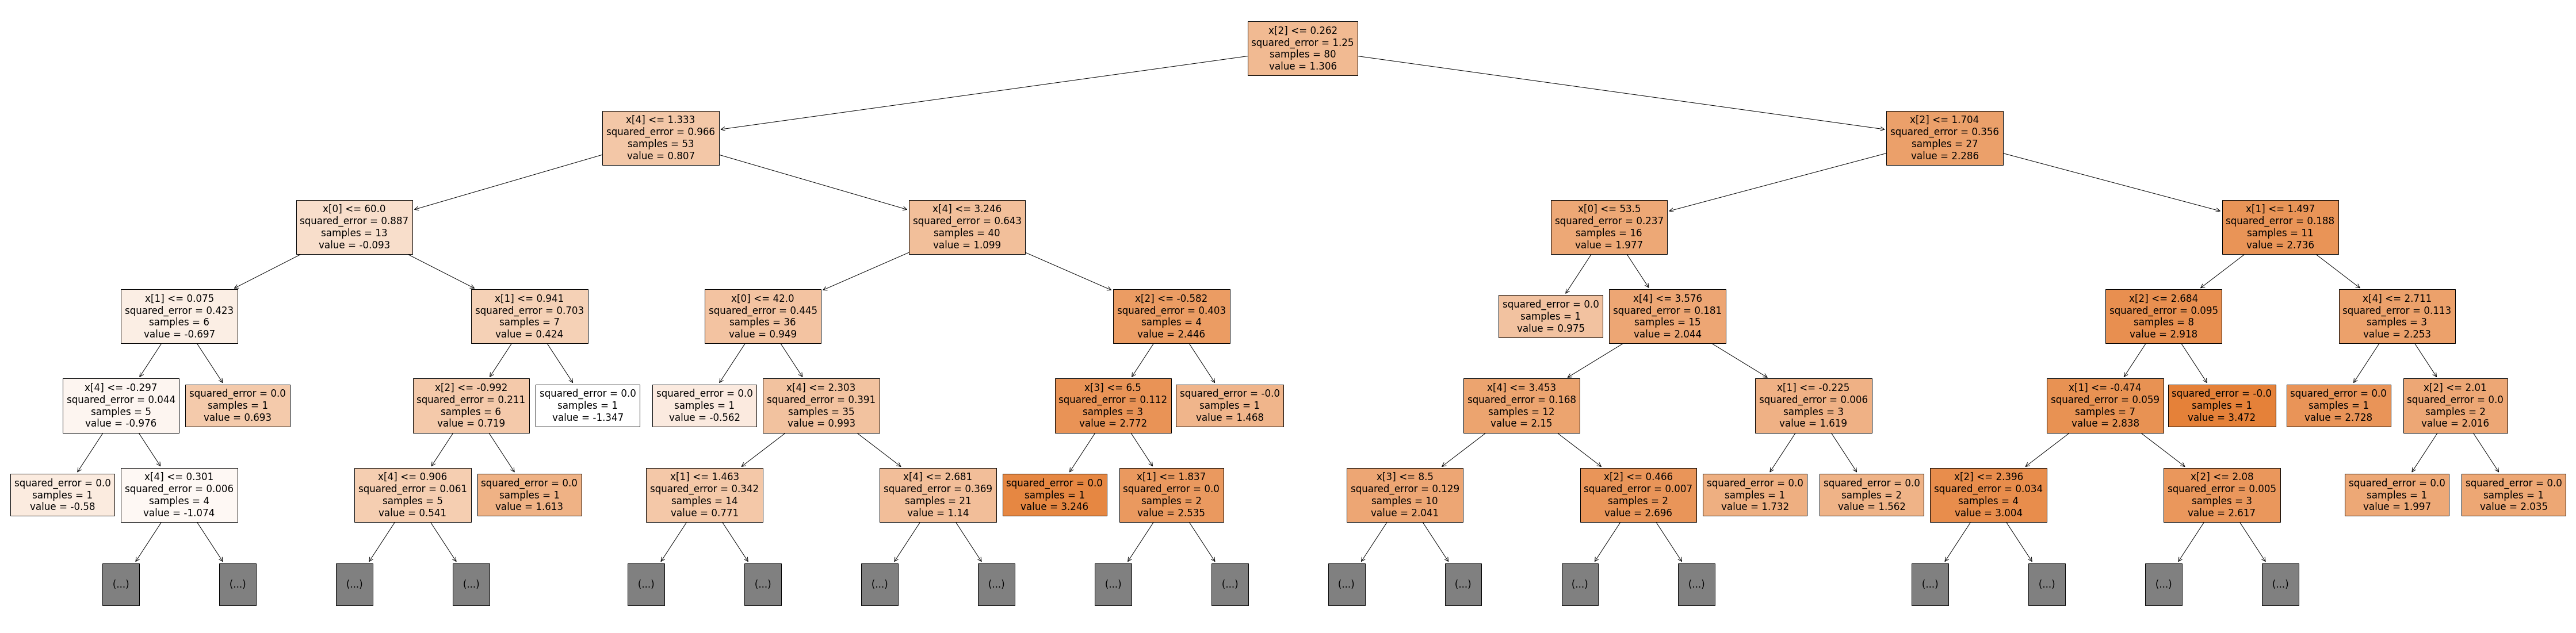

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
plt.figure(figsize =(80,20))
plot_tree(rt,max_depth=5, filled=True)

**Node Count.**

In [ ]:
count = rt.tree_
print(count.node_count)

149


**Evaluating the performance.**

***Mean Absolute Error(MAE)***

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.8494860396500001


***Mean Squared error(MSE)***

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.1205322273985687


***Root Mean Square Error(RMSE)***

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.058551948370305


***R Squared score(R2)***

In [ ]:
print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.43686532475525675


**Feature Importance.**

In [ ]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

lcp 0.4607887189070047
lpsa 0.31106782561107477
age 0.09130958059609205
lbph 0.09088914373448975
gleason 0.04594473115133879


**Visualization of decision tree regressor.**

# **K-Fold**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state = 0))
scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=2, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy scores: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [ 0.29537568 -0.01539178]
Cross Validation accuracy scores: 0.140 +/- 0.155


# **Prune Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=rt,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train r2 score {metrics.r2_score(y_train, y_train)}')
print(f'Test r2 score {metrics.r2_score(y_test, y_pred)}')

Train r2 score 1.0
Test r2 score 0.43686532475525675


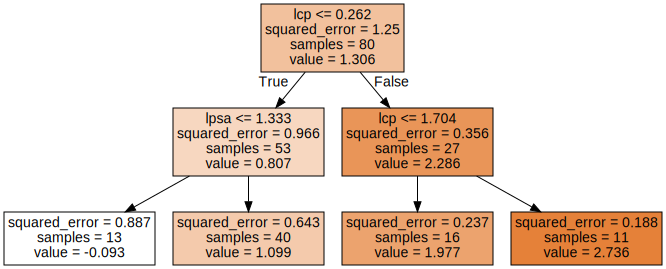

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

In [ ]:
path = rt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    
    regs.append(reg)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        regs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4896071776292392


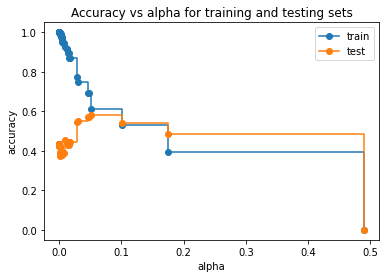

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in regs]
test_scores = [clf.score(X_test, y_test) for clf in regs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**As variance and bias is lowest at 0.05 value of alpha we will construct final regression tree using alpha 0.05**

In [ ]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.05)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.05, random_state=0)

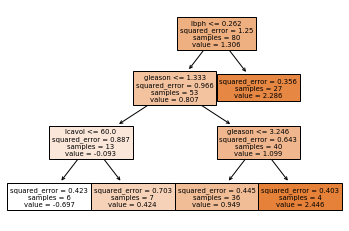

In [ ]:
tree.plot_tree(reg,feature_names=df.columns,class_names='lcavol',filled=True)
plt.show()